The goal of learning is reached


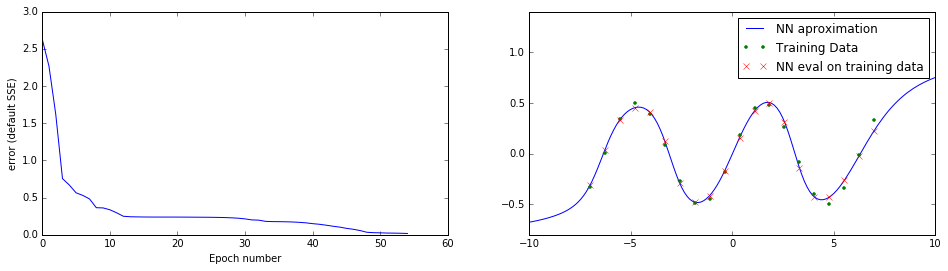

In [24]:
import os
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt
from colorama.initialise import init
%matplotlib inline
from ipywidgets import widgets
from ipywidgets import *



def testcase1(nnhl=5):
    '''  This is a test case to see how is the impact of the Number of neurons in the hidden layer
    
    input: 
    nnhl = Number of neurons in the hidden layer
    '''
    # Create train samples
    x = np.linspace(-7, 7, 20)
    y = np.sin(x) * 0.5

    size = len(x)

    inp = x.reshape(size,1)
    tar = y.reshape(size,1)

    # Create network with 2 layers and random initialized
    inputdomain = [[min(x), max(x)]]
    hl = [nnhl, 1] #  hidden layer architecture
    net = nl.net.newff(inputdomain,hl)

    # Train network
    error = net.train(inp, tar, epochs=500, show=100, goal=0.02)

    # Simulate network
    out = net.sim(inp)

    # Plot result
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4),dpi= 80)
    ax1.plot(error)
    ax1.set_xlabel('Epoch number')
    ax1.set_ylabel('error (default SSE)')

    x2 = np.linspace(-10.0,10.0,150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

    y3 = out.reshape(size)

    ax2.plot(x2, y2, '-',x , y, '.', x, y3, 'x')
    ax2.legend(['NN aproximation', 'Training Data','NN eval on training data'])
    ax2.set_ylim(ymax = 1.40, ymin = -0.8)
    
interact(testcase1,  nnhl = (1,30,1))    

Epoch: 100; Error: 1977.2198707815041;
Epoch: 200; Error: 1977.2196607391545;
Epoch: 300; Error: 1977.2196531245504;


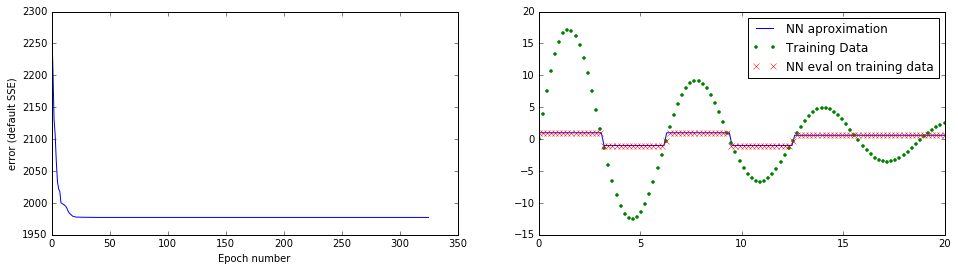

In [42]:
def testcase2(nnhl=5):
    '''  This is a test case to see how is the impact of the Number of neurons in the hidden layer
    
    input: 
    nnhl = Number of neurons in the hidden layer
    '''
    # Create train samples
    x = np.linspace(0, 20, 100)
    y = np.array([20*np.exp(-xi*0.1)*np.sin(xi) for xi in x])

    size = len(x)

    inp = x.reshape(size,1)
    tar = y.reshape(size,1)

    # Create network with 2 layers and random initialized
    inputdomain = [[min(x), max(x)]]
    hl = [nnhl, 1] #  hidden layer architecture
    net = nl.net.newff(inputdomain,hl)

    # Train network
    error = net.train(inp, tar, epochs=500, show=100, goal=0.02)

    # Simulate network
    out = net.sim(inp)

    # Plot result
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4),dpi= 80)
    ax1.plot(error)
    ax1.set_xlabel('Epoch number')
    ax1.set_ylabel('error (default SSE)')

    x2 = np.linspace(min(x),max(x),150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

    y3 = out.reshape(size)

    ax2.plot(x2, y2, '-',x , y, '.', x, y3, 'x')
    ax2.legend(['NN aproximation', 'Training Data','NN eval on training data'])
    #ax2.set_ylim(ymax = 1.40, ymin = -0.8)
    
interact(testcase2,  nnhl = (1,30,1))    

Epoch: 300; Error: 4.815657411494065;
The maximum number of train epochs is reached


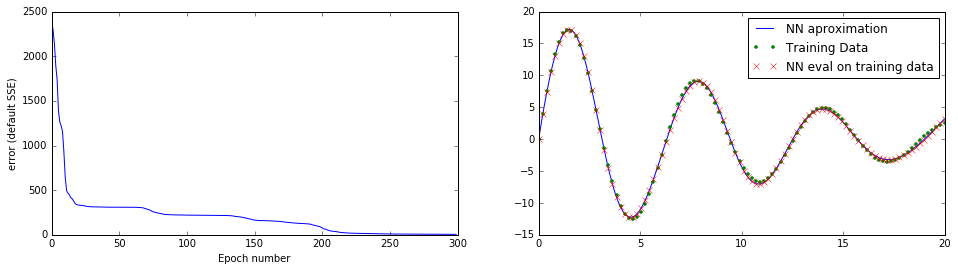

In [47]:
def testcase3(nnhl=5):
    '''  This is a test case to see how is the impact of the Number of neurons in the hidden layer
    
    input: 
    nnhl = Number of neurons in the hidden layer
    '''
    # Create train samples
    x = np.linspace(0, 20, 100)
    y = np.array([20*np.exp(-xi*0.1)*np.sin(xi) for xi in x])

    size = len(x)

    inp = x.reshape(size,1)
    tar = y.reshape(size,1)

    # Create network with 2 layers and random initialized
    inputdomain = [[min(x), max(x)]]
    hl = [nnhl, 1] #  hidden layer architecture
    transf=[nl.trans.TanSig(),nl.trans.PureLin()] # activation function
    net = nl.net.newff(inputdomain,hl,transf)
    
    # initialize the sinapse weights
    net.layers[0].initf = nl.init.InitRand([-0.01, 0.01], 'wb')
    net.layers[1].initf= nl.init.InitRand([-0.01, 0.01], 'wb')
    
    # Train network
    error = net.train(inp, tar, epochs=300, show=300, goal=0.02)

    # Simulate network
    out = net.sim(inp)

    # Plot result
    f, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4),dpi= 80)
    ax1.plot(error)
    ax1.set_xlabel('Epoch number')
    ax1.set_ylabel('error (default SSE)')

    x2 = np.linspace(min(x),max(x),150)
    y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

    y3 = out.reshape(size)

    ax2.plot(x2, y2, '-',x , y, '.', x, y3, 'x')
    ax2.legend(['NN aproximation', 'Training Data','NN eval on training data'])
    #ax2.set_ylim(ymax = 1.40, ymin = -0.8)
    
interact(testcase3,  nnhl = (1,30,1))    